In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator

%matplotlib inline
# Download solar-system.csv
# Read your file's data solar-system.csv
raw_data = pd.read_csv('You path/solar-system.csv', encoding = 'unicode_escape')
raw_data[:50]

,Unnamed: 0,N°,PuissanceWc,HMTm,CostTND
0,NaN,1,1050,21,0.128
1,NaN,2,1120,30,0.171
2,NaN,3,1190,35,0.242
3,NaN,4,1200,60,0.366
4,NaN,5,1200,36,0.244
5,NaN,6,1260,25,0.256
6,NaN,7,1300,20,0.264
7,NaN,8,1350,20,0.274
8,NaN,9,1400,25,0.213
9,NaN,10,1450,25,0.221


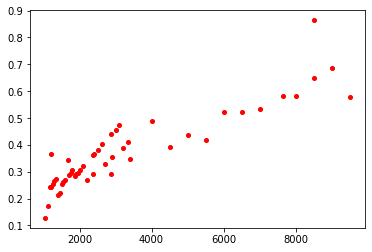

In [5]:
# Curve display
plt.plot(raw_data['PuissanceWc'], raw_data['CostTND'], 'ro', markersize=4)
plt.show()

In [18]:
# Clean the data
data = raw_data[raw_data["CostTND"] < 0.8]
# Display data (where CostTND < 0.8)
data

,Unnamed: 0,N°,PuissanceWc,HMTm,CostTND
0,NaN,1,1050,21,0.128
1,NaN,2,1120,30,0.171
2,NaN,3,1190,35,0.242
3,NaN,4,1200,60,0.366
4,NaN,5,1200,36,0.244
5,NaN,6,1260,25,0.256
6,NaN,7,1300,20,0.264
7,NaN,8,1350,20,0.274
8,NaN,9,1400,25,0.213
9,NaN,10,1450,25,0.221


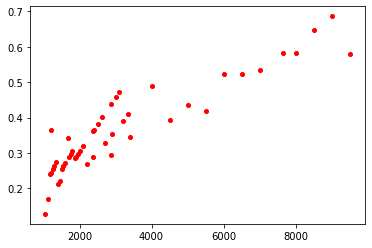

In [19]:
# Curve display
plt.plot(data['PuissanceWc'], data['CostTND'], 'ro', markersize=4)
plt.show()


In [21]:
# We decompose the dataset and we transform it into matrices to be able to perform our calculation
X = np.matrix([np.ones(data.shape[0]), data['PuissanceWc'].values]).T
y = np.matrix(data['CostTND']).T

# We perform the exact calculation of the theta parameter
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta)

[[2.06393337e-01]
 [4.92641113e-05]]


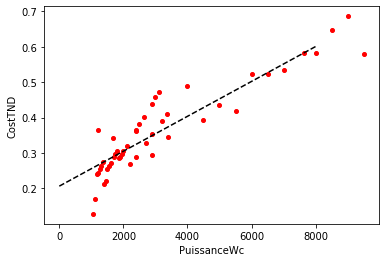

In [23]:
# Our final model that sticks well to the data will therefore be in our case (approximately)
# CostTND = 4.92641113e-05 × PuissanceWc + 2.06393337e-01
plt.xlabel('PuissanceWc')
plt.ylabel('CostTND')

plt.plot(data['PuissanceWc'], data['CostTND'], 'ro', markersize=4)

# On affiche la droite entre 0 et 8000
plt.plot([0,8000], [theta.item(0),theta.item(0) + 8000 * theta.item(1)], linestyle='--', c='#000000')

plt.show()